In [87]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [89]:
def get_compounded_future_value(curr_v, r, t):
    """
    Inputs:
    curr_v <int> or <float>: current value of an asset
    r <float>: compound interest
    t <int>: number of time steps
    
    Returns:
    future_value <float>: value of an asset after t time steps, assuming compound interest of r
    """
    return curr_v * (1 + r)**t

In [90]:
def get_r(curr_v, future_v, t):
    """
    Inputs:
    curr_v <int> or <float>: current value of an asset
    future_v <int> or <float>: future value of an asset
    t <int>: number of time steps
    
    Returns:
    r <float>: value compound interest for each time step t
    """
    return (future_v / curr_v)**(1 / t) - 1

In [91]:
def get_discounted_curr_value(future_v, r, t):
    """
    Inputs:
    future_v <int> or <float>: future value of an asset
    r <float>: compound interest
    t <int>: number of time steps
    
    Returns:
    curr_value <float>: today's discounted value of a future asset
    """
    return future_v / (1 + r)**t

Imagine we invest in a well. It gives return of $\$1.50$ per day. What is the real price of a well, taking into account a (yearly) discount factor?

In [96]:
cash_flow_per_year = 1.5 * 365
discount_rate = .1

In [97]:
vals = []
t = 1

while True:
    curr_val = get_discounted_curr_value(cash_flow_per_year, discount_rate, t)
    
    if curr_val < .01:
        break
    
    vals.append(curr_val)
    
    t += 1

In [98]:
print(f'The well is worth around {sum(vals)}\nReturn value reached less than USD 0.01 in {len(vals)} years')

The well is worth around 5474.895379205083
Return value reached less than USD 0.01 in 114 years


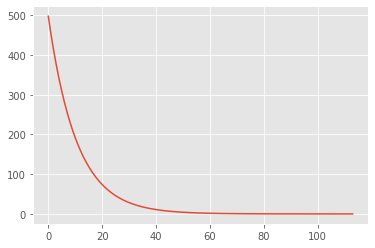

In [99]:
plt.plot(vals)

In [105]:
savings_per_yr = 9000 * 12
infl_rate = .03
t = 10
savings = []

for i in range(t):
    savings.append(get_discounted_curr_value(savings_per_yr, infl_rate, i))

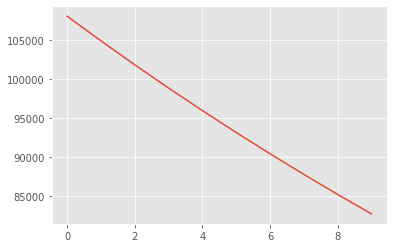

In [106]:
plt.plot(savings)

In [107]:
sum(savings) #+ get_discounted_curr_value(40000, infl_rate, 7)

948899.7635629431

We have bonds with face value of $\$100$. Semi-annual coupon rate is equal to $1.25\%$. Discount facotr is $r = 1.2\%$. What is DCF of these bonds if $T = 6$?

In [85]:
cr = 1.25
r = .012
fv = 100
T = 6

vals = []

for t in range(T):
    if t < T - 1:
        vals.append(get_discounted_curr_value(cr, r, t + 1))
    else:
        vals.append(get_discounted_curr_value(cr + fv, r, t + 1))
        
sum(vals)

100.28779256924156

## Exercise 2

Which choice is the best one?

* \$1000 today
* \$2000 3 yrs from now
* \$3000 10 yrs from now

Compute for two discount rates: $5%$ and $10%$

In [113]:
# Define the problem (reward, periods)
discount_rates = [.05, .1]

option_1 = (1000, 0)
option_2 = (2000, 3)
option_3 = (3000, 10)

options = [option_1, option_2, option_3]

In [116]:
results = []

for dr in discount_rates:
    
    for option in options:
        
        reward = option[0]
        period = option[1]
        
        total_reward = get_discounted_curr_value(reward, dr, period)
            
        results.append((dr, option, total_reward))

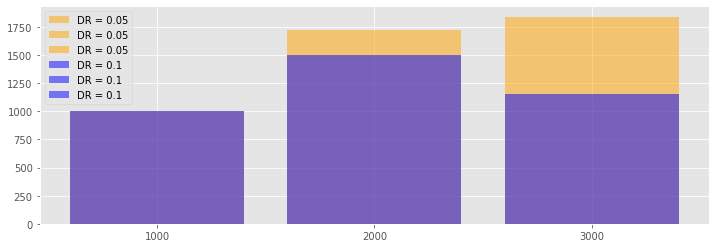

Initial value: 1000
Conditions: (0.05, 0)
1000.00

Initial value: 2000
Conditions: (0.05, 3)
1727.68

Initial value: 3000
Conditions: (0.05, 10)
1841.74

Initial value: 1000
Conditions: (0.1, 0)
1000.00

Initial value: 2000
Conditions: (0.1, 3)
1502.63

Initial value: 3000
Conditions: (0.1, 10)
1156.63



In [145]:
plt.figure(figsize = (12, 4))

for result in results:
    if result[0] == .05:
        color = 'orange'
    else:
        color = 'blue'
    plt.bar(str(result[1][0]), result[2], alpha = .5, color = color, label = f'DR = {result[0]}')
    f'{result[2]:0.2f}'
    
plt.legend()
plt.show()

for result in results:
    print(f'Initial value: {result[1][0]}\nConditions: {result[0], result[1][1]}\n{result[2]:0.2f}\n')